In [1]:
%load_ext autoreload
%autoreload 2

# Batch Bayesian Optimization with Kriging Beliver
This notebook details the procedure for performing the batched Bayesian optimization using the [Kriging Beliver](http://www.cs.ubc.ca/labs/beta/EARG/stack/2010_CI_Ginsbourger-ParallelKriging.pdf) algorithm. In short, the Kriging Beliver algorithm selects $q$ query points by (1) selecting the best cannidiate according to the acquisition function, (2) appending the predicted mean and variance of the selected point to the training data, (3) refitting the GPR given the augmented data set, and (4) repeating steps 1-3 until $q$ points have been selected for querying. 

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from active_learning.BO import BayesianOptimizer
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

### Helper functions

In [4]:
def f(x):
    """The function to predict."""
    return -2 * (6*x - 2)**2 * np.sin(12*x - 4)

def plot_results(X, y, dy, x, y_pred, sigma, new_p):
    plt.figure(figsize=(10,5))
    plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(3x)$')
    plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label='Observations')
    plt.plot(x, y_pred, 'b-', label='Prediction')
    plt.fill(np.concatenate([x, x[::-1]]),
             np.concatenate([y_pred - 1.9600 * sigma,
                            (y_pred + 1.9600 * sigma)[::-1]]),
             alpha=.5, fc='b', ec='None', label='95% confidence interval')
    plt.scatter(new_p, f(new_p), color='k', s=50, label='Query points')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.ylim(-40, 40)
    plt.legend(loc='upper left')

### Batched Bayesian Optimization

Seed model N = 10 noisy observations

In [5]:
N = 4 # Number of points to sample
X = np.random.sample(N)
X = np.atleast_2d(X).T
x = np.atleast_2d(np.linspace(0, 1, 1000)).T
# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

Instatiate the BayesianOptimizer object

In [6]:
kernel = ConstantKernel() * RBF()
BO = BayesianOptimizer(kernel=kernel)

Fit the model given the observations. By default a vanilla RBF kernel is used. By default the model is fit internal through expecation maximization (i.e. maximizing the log marginal liklihood w.r.t the kernel hyperparamters).

In [7]:
BO.fit(X, y, std=dy**2)

Once the model is fit, we can predict on a pool of possible points `x`.

In [8]:
y_pred, sigma = BO.predict(x, return_std=True)

We can now call `BO.query` to query our current model state and select `q = 5` points for sampling. There points are selected using the Kriging Beliver algorithm by default. Set the `epsilon` value in the EI acquisition to `0.1` to help better encourge exploration.

In [9]:
new_p = BO.query(x, q = 3, epsilon=0.1)
new_p

array([[0.77577578],
       [0.88188188],
       [0.73573574]])

We can now plot the results. The dotted red line is the ground truth function we're aiming to fit, the solid blue line is the GPR preduction with assocaited 95% confidence interval, the red points are the observations used to fit the GPR, and the black points are the points selected to be querred next. 

### Iteration #1

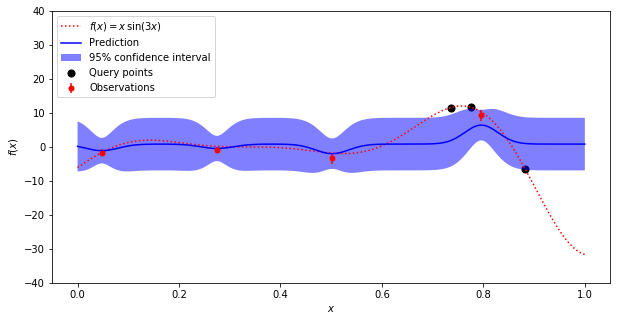

In [10]:
X = BO.X
y = BO.y
dy = BO.sigma
plot_results(X, y, dy, x, y_pred, sigma, new_p)

Notice how a diversity of points throughout the space are selected as a result of this batched selection.

In [11]:
noise_new = 0.5 + 1.0 * np.random.random(new_p.shape)
BO.teach(new_p, (f(new_p) + noise_new).flatten(), noise_new.flatten()**2)
y_pred, sigma = BO.predict(x)
new_p = BO.query(x, q = 3, epsilon=0.1)

### Iteration #2

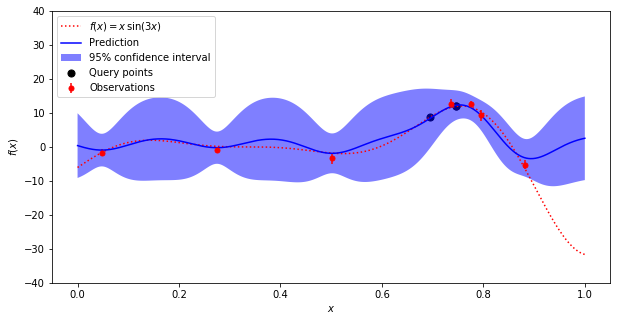

In [12]:
X = BO.X
y = BO.y
dy = BO.sigma
plot_results(X, y, dy, x, y_pred, sigma, new_p)

In [13]:
noise_new = 0.5 + 1.0 * np.random.random(new_p.shape)
BO.teach(new_p, (f(new_p) + noise_new).flatten(), noise_new.flatten()**2)
y_pred, sigma = BO.predict(x)
new_p = BO.query(x, q = 3, epsilon=0.1)

### Iteration #3

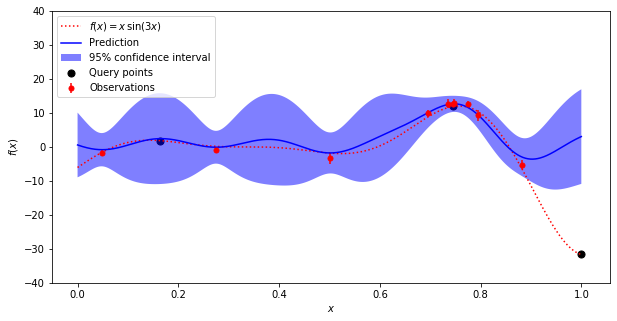

In [14]:
X = BO.X
y = BO.y
dy = BO.sigma
plot_results(X, y, dy, x, y_pred, sigma, new_p)

In [15]:
noise_new = 0.5 + 1.0 * np.random.random(new_p.shape)
BO.teach(new_p, (f(new_p) + noise_new).flatten(), noise_new.flatten()**2)
y_pred, sigma = BO.predict(x)
new_p = BO.query(x, q = 3, epsilon=0.1)

### Iteration #4

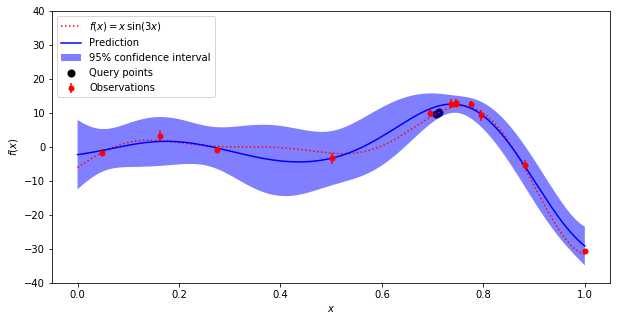

In [16]:
X = BO.X
y = BO.y
dy = BO.sigma
plot_results(X, y, dy, x, y_pred, sigma, new_p)

In [17]:
noise_new = 0.5 + 1.0 * np.random.random(new_p.shape)
BO.teach(new_p, (f(new_p) + noise_new).flatten(), noise_new.flatten()**2)
y_pred, sigma = BO.predict(x)
new_p = BO.query(x, q = 3, epsilon=0.1)

### Iteration #5

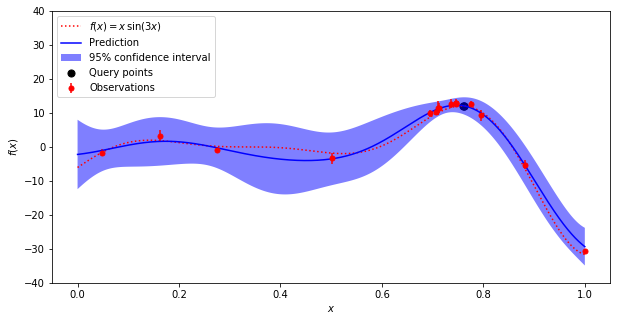

In [18]:
X = BO.X
y = BO.y
dy = BO.sigma
plot_results(X, y, dy, x, y_pred, sigma, new_p)

In [19]:
noise_new = 0.5 + 1.0 * np.random.random(new_p.shape)
BO.teach(new_p, (f(new_p) + noise_new).flatten(), noise_new.flatten()**2)
y_pred, sigma = BO.predict(x)
new_p = BO.query(x, q = 3, epsilon=0.1)

### Iteration #6

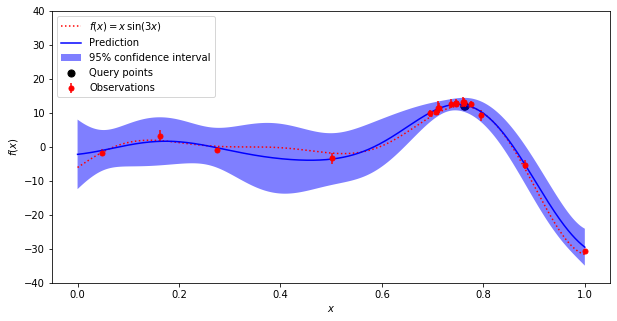

In [20]:
X = BO.X
y = BO.y
dy = BO.sigma
plot_results(X, y, dy, x, y_pred, sigma, new_p)